We analyze Boston Housing Data Frame.The following describes the dataset variables:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10000 USD
* PTRATIO - pupil-teacher ratio by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in 1000's USD

 1. Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.api as sm # statistics
import matplotlib.pyplot as plt # plots
from statsmodels.formula.api import ols # import ols from formula.api
import seaborn as sns # visualization functions

 2. Load data base

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url) #stores contents in a DataFrame object boston_df
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


**QUESTION 1**.For the "Median value of owner-occupied homes" provide a boxplot

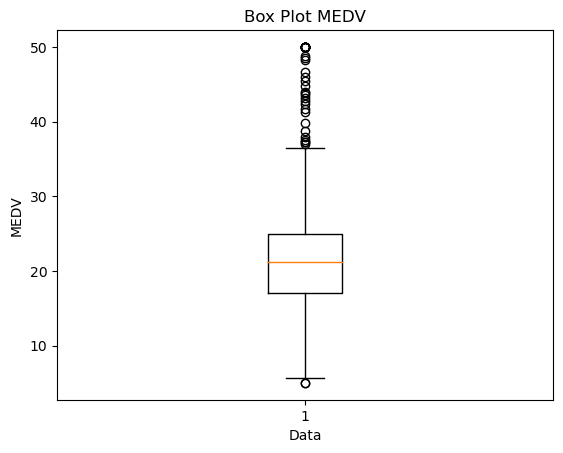

In [3]:
#Creating the box plot for MEDV
plt.boxplot(boston_df['MEDV'])
plt.title("Box Plot MEDV")
plt.xlabel("Median Value of Owner-occupied homes in $1000")
plt.ylabel("MEDV")
plt.show()

**QUESTION 2**.Provide a  bar plot for the Charles river variable

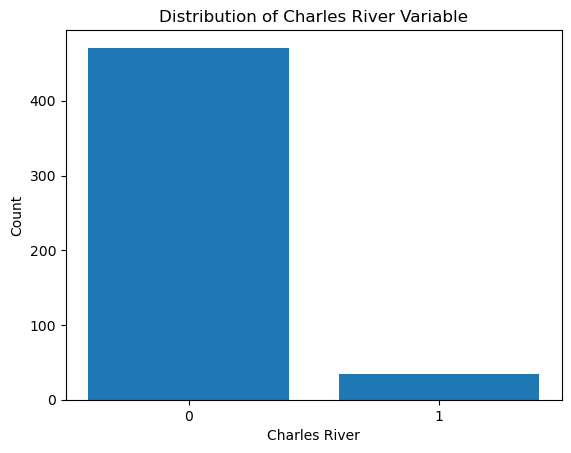

In [4]:
# create a bar plot for the Charles river variable
plt.bar(['0', '1'], boston_df['CHAS'].value_counts())

# add labels and title
plt.xlabel('Charles River')
plt.ylabel('Count')
plt.title('Distribution of Charles River Variable')

# show the plot
plt.show()

**QUESTION 3**.Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [5]:
#divide by groups
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV                age_group  
0  296.0     15.3   4.98  24.0  between 35 and 70 years  
1  242.0     17.8   9.14  21.6       70 years and older  
2  242.0     17.8   4.03  34.7  between 35 and 70 years  
3  222.0     18.7   2.94  33.4  between 35 and 70 years  
4  222.0     18.7   5.33  36.2  between 35 and 70 years  


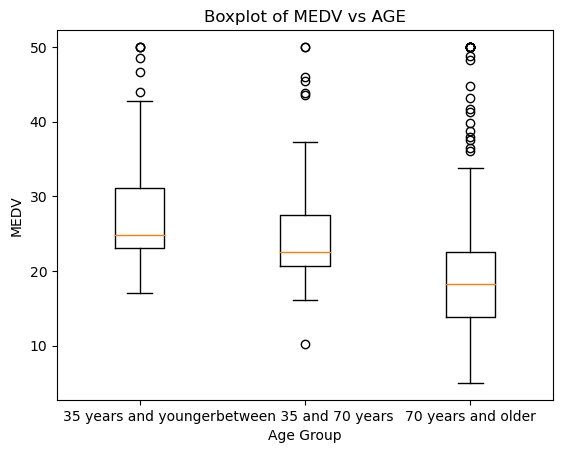

In [6]:

# create a boxplot for MEDV vs AGE
plt.boxplot([boston_df[boston_df['AGE'] <= 35]['MEDV'],
             boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)]['MEDV'],
             boston_df[boston_df['AGE'] >= 70]['MEDV']],
            labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# set the title and axes labels
plt.title('Boxplot of MEDV vs AGE')
plt.xlabel('Age Group')
plt.ylabel('MEDV')

# show the plot
plt.show()

**QUESTION 4**.Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



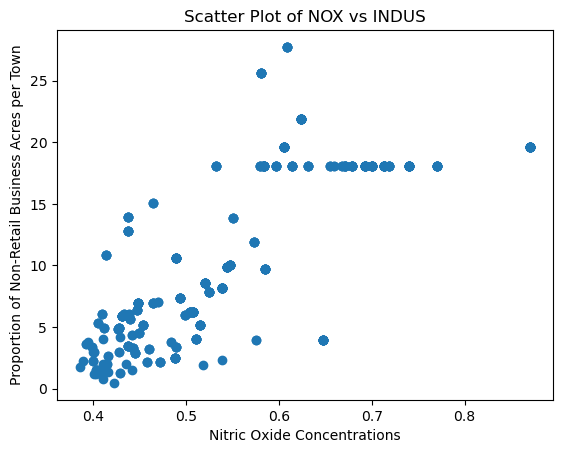

In [7]:
#create a scatter plot of NOX vs INDUS
plt.scatter(boston_df['NOX'], boston_df['INDUS'])

# set the title and axes labels
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')

# show the plot
plt.show()

**QUESTION 5**.Create a histogram for the pupil to teacher ratio variable

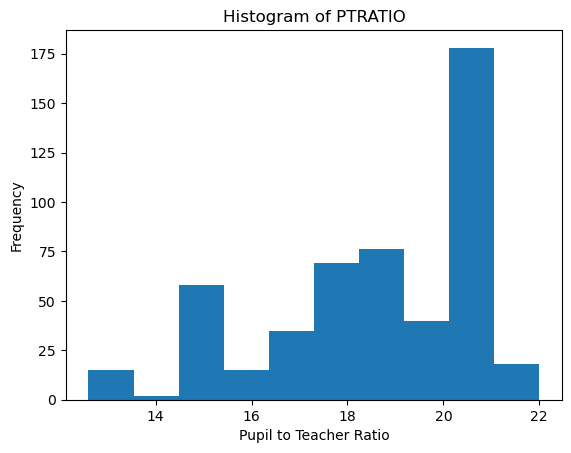

In [8]:
#create a histogram of PTRATIO
plt.hist(boston_df['PTRATIO'], bins=10)

#set the title and axes labels
plt.title('Histogram of PTRATIO')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')

#show the plot
plt.show()

**QUESTION 6**. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

We assume the following hypothetis
* P Value =0.05
*  H0 There is no significant difference in median value of houses bounded by the Charles river 
*  H1 There is significant difference in median value of houses bounded by the Charles river


In [9]:
from statsmodels.stats.weightstats import ttest_ind
t_statistic, p_value, _ = ttest_ind(boston_df['CHAS'], boston_df['MEDV'], alternative='two-sided')

print('Stats: ', t_statistic)
print('Value :', p_value)

Stats:  -54.9210289745203
Value : 1.4651540072350996e-305


**ANSWER**. Yes, there is no significant difference in median value of houses bounded by the Charles river. P_value=1.4651540072350996e-305<0.05

**QUESTION 7.** Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

* P Value = 0.05
* H0 - There is no significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.
* H1 - There is significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.

The ANOVA table will show whether there is a statistically significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940. The p-value associated with the C(AGE) term in the table will indicate whether there is a significant effect of AGE on MEDV. If the p-value is less than 0.05, we can conclude that there is a statistically significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.

In [10]:
#create a linear model with MEDV as the response variable and AGE as the predictor variable
model = ols('MEDV ~ C(AGE)', data = boston_df).fit()
# perform ANOVA on the model
anova_table= sm.stats.anova_lm(model)
# print the ANOVA table
print(anova_table)

             df        sum_sq   mean_sq         F   PR(>F)
C(AGE)    355.0  29884.038419  84.18039  0.984009  0.55397
Residual  150.0  12832.256996  85.54838       NaN      NaN


***ANSWER***. P value =0.55397>0.05. There is a significant difference in means of of MEDV (median values of houses) for for each proportion of owner-occupied units built prior to 1940 (AGE) in the boston_df DataFrame.

***QUESTION 8***.Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [11]:
# calculate the Pearson correlation coefficient between x and y
pearson_corr = boston_df['NOX'].corr(boston_df['INDUS'])
print(pearson_corr)

0.763651446920914


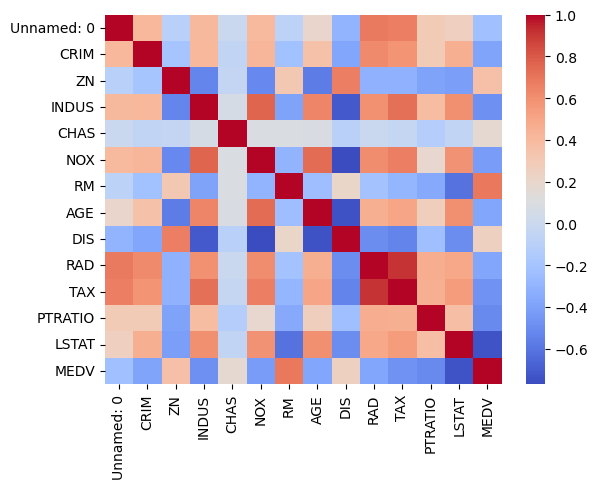

In [12]:
# calculate the correlation matrix
corr_matrix = corr_matrix = boston_df.corr(numeric_only=True)
# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# show the plot
plt.show()

***ANSWER*** We can say that there is a strong correlation between Nitric oxide concentrations and proportion of non-retail business acres per town as Pearson correlation = 0.763651446920914.



***QUESTION 9*** What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [13]:
#setting variables
X=boston_df['DIS']
Y=boston_df['MEDV']
# Add a constant term to the independent variables, allow the regression line to have an intercept point with the y-axis, even when the independent variables are zero.
X = sm.add_constant(X) 
# Fit the linear regression model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary of the regression analysis
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        22:08:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

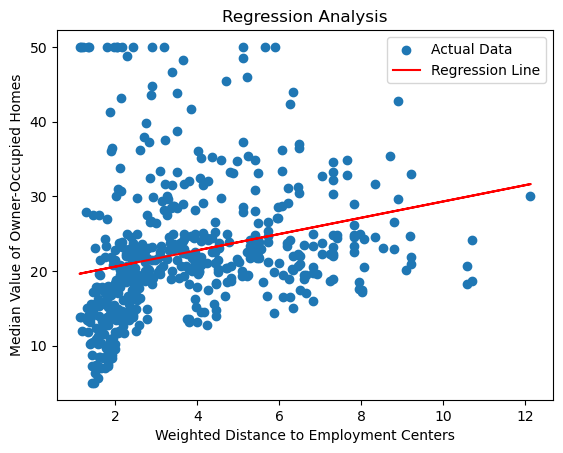

In [14]:
 # Plotting the regression line and data points
plt.scatter(X['DIS'], Y, label='Actual Data')
plt.plot(X['DIS'], results.fittedvalues, color='red', label='Regression Line')
plt.xlabel('Weighted Distance to Employment Centers')
plt.ylabel('Median Value of Owner-Occupied Homes')
plt.title('Regression Analysis')
plt.legend()
plt.show()


***ANSWER*** The F-statistic is 33.58, with a corresponding p-value of 1.21e-08. This indicates that the overall regression model is statistically significant, implying that the independent variable DIS has a significant relationship with the dependent variable MEDV.

The p-values for the coefficients of both the constant term and DIS are very small (close to zero), suggesting that they are statistically significant. In other words, there is strong evidence to suggest that both the constant term and the weighted distance variable have a significant impact on the median value of owner-occupied homes.

